In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# define project root / change to match your path
gdrive_project_root = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"

In [7]:
df = pd.read_csv(gdrive_project_root + '/data/processed/cancer_data_preprocessed.csv', delimiter=',')
df.head()

FileNotFoundError: ignored

In [ ]:
list(df.columns)

['Study ID',
 'Mutation Count',
 'Oncotree Code',
 'Overall Survival (Months)',
 'Overall Survival Status',
 'Number of Samples Per Patient',
 'Sex',
 'Somatic Status',
 'Diagnosis Age',
 'Additional_cancer',
 'Age Group']

In [ ]:
X_cols = ['Study ID',
          'Mutation Count',
          'Overall Survival (Months)',
          'Overall Survival Status',
          'Number of Samples Per Patient',
          'Sex',
          'Somatic Status',
          'Diagnosis Age',
          'Additional_cancer',
          'Age Group']
y_col = ['Oncotree Code']

In [ ]:
X = df[X_cols]
y = df[y_col]

In [ ]:
len(X.columns)

6

In [ ]:
y['Oncotree Code'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4525a9b590>]],
      dtype=object)

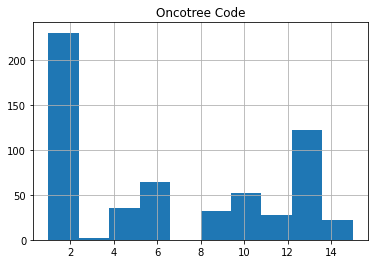

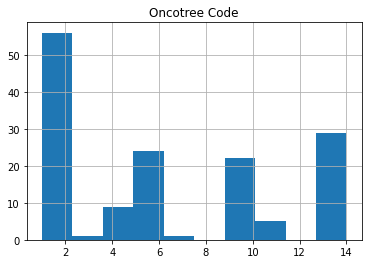

In [ ]:
y_train.hist()
y_test.hist()

In [ ]:
y_test.value_counts()

Oncotree Code
1                35
6                22
13               21
2                21
10               15
4                 9
14                8
9                 7
11                5
5                 2
7                 1
3                 1
dtype: int64

In [ ]:
y_test['Oncotree Code'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14])

In [ ]:
clf = LogisticRegression().fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.69      0.94      0.80        35
           2       0.39      0.43      0.41        21
           3       0.00      0.00      0.00         1
           4       0.25      0.11      0.15         9
           5       0.00      0.00      0.00         2
           6       0.27      0.14      0.18        22
           7       0.00      0.00      0.00         1
           9       0.50      0.14      0.22         7
          10       0.28      0.33      0.30        15
          11       0.00      0.00      0.00         5
          13       0.47      0.90      0.62        21
          14       0.00      0.00      0.00         8

    accuracy                           0.48       147
   macro avg       0.24      0.25      0.22       147
weighted avg       0.40      0.48      0.41       147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# raise Exception("Takes time. Comment the line to run" )
accuracy = []
for i in range(10, 800, 10):
  clf = RandomForestClassifier(n_estimators=i, random_state=42, n_jobs=-1)
  clf.fit(x_train, y_train)
  predictions = clf.predict(x_test)
  accuracy.append(accuracy_score(y_test, predictions))

print(np.max(accuracy), " - ", np.argmax(accuracy, axis=0))

pd.Series(accuracy).plot()

NameError: ignored

In [ ]:
clf = RandomForestClassifier(n_estimators=330, random_state=42, n_jobs=-1)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.5918367346938775
              precision    recall  f1-score   support

           1       0.72      0.97      0.83        35
           2       0.40      0.57      0.47        21
           3       0.00      0.00      0.00         1
           4       1.00      0.11      0.20         9
           5       0.00      0.00      0.00         2
           6       0.29      0.23      0.26        22
           7       0.00      0.00      0.00         1
           9       1.00      0.43      0.60         7
          10       0.73      0.73      0.73        15
          11       0.20      0.20      0.20         5
          13       0.71      0.95      0.82        21
          14       0.00      0.00      0.00         8

    accuracy                           0.59       147
   macro avg       0.42      0.35      0.34       147
weighted avg       0.57      0.59      0.54       147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


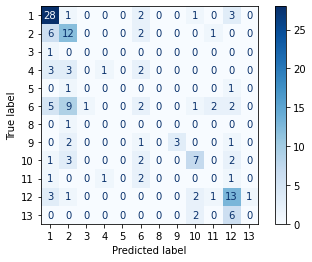

In [ ]:
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues)

In [ ]:
print(clf.predict_proba([x_test.values[1]]))
print(y_test.values[1])

# pd.Series(clf.predict_proba(x_test.values[3])).plot(kind='bar')
# print(y_test.values[3])


[[0.48181818 0.2030303  0.         0.00606061 0.01212121 0.
  0.17575758 0.04242424 0.02727273 0.05151515 0.         0.
  0.         0.        ]]
[3]


In [ ]:

feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
print(feat_importances.nlargest(100).to_string())

AttributeError: ignored

# Removing Study ID 
---
Not sure if Study ID is connected with the type of cancer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[X.columns.difference(['Study ID'])], y ,test_size = 0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=330, random_state=42)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.4489795918367347
              precision    recall  f1-score   support

           1       0.58      0.80      0.67        35
           2       0.36      0.57      0.44        21
           3       0.00      0.00      0.00         1
           4       0.50      0.11      0.18         9
           5       0.00      0.00      0.00         2
           6       0.15      0.09      0.11        22
           7       0.00      0.00      0.00         1
           9       1.00      0.43      0.60         7
          10       0.54      0.47      0.50        15
          11       0.00      0.00      0.00         5
          13       0.45      0.62      0.52        21
          14       0.00      0.00      0.00         8

    accuracy                           0.45       147
   macro avg       0.30      0.26      0.25       147
weighted avg       0.41      0.45      0.41       147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
confusion_matrix(y_test, predictions)

array([[34,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 5, 11,  0,  1,  0,  2,  0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  4,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 10,  1,  0,  0,  4,  0,  0,  2,  3,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  3,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  3,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0]])

# Testing with top 6 classes

In [ ]:
dft6 = pd.read_csv(gdrive_project_root + '/data/processed/cancer_data_preprocessed_top_6classes.csv', delimiter=',')
dft6.head()

,Study ID,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sex,Somatic Status,Diagnosis Age,Additional_cancer,Age Group
0,1,161,1,25.92,1,1,1,1,64.0,0,1
1,1,79,1,24.24,1,1,1,1,56.0,0,1
2,1,77,1,13.32,1,1,1,1,58.0,0,1
3,1,75,1,19.32,1,1,0,1,68.0,0,1
4,1,160,1,17.88,1,1,0,1,59.0,0,1


In [ ]:
Xt6 = dft6[X_cols].drop(['Study ID'], axis=1)
yt6 = dft6[y_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xt6, yt6, test_size = 0.2, random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e3308a310>]],
      dtype=object)

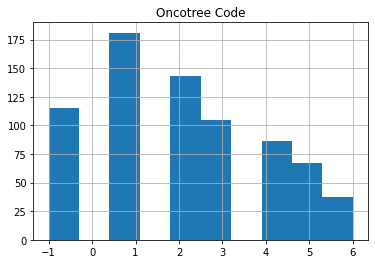

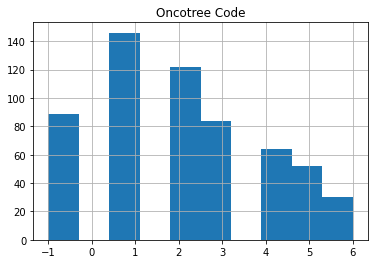

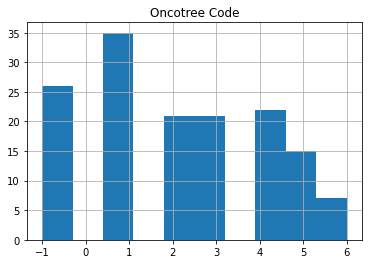

In [ ]:
yt6.hist()
y_train.hist()
y_test.hist()

In [ ]:
clf = RandomForestClassifier(n_estimators=330, random_state=42, n_jobs=-1)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.42857142857142855
              precision    recall  f1-score   support

          -1       0.17      0.12      0.14        26
           1       0.62      0.80      0.70        35
           2       0.45      0.62      0.52        21
           3       0.27      0.33      0.30        21
           4       0.23      0.14      0.17        22
           5       0.46      0.40      0.43        15
           6       1.00      0.43      0.60         7

    accuracy                           0.43       147
   macro avg       0.46      0.40      0.41       147
weighted avg       0.41      0.43      0.41       147



- 'GBM': 1,
- 'PHC': 2,
- 'AASTR': 3,
- 'ODG': 4,
- 'OAST': 5,
- 'ASTR': 6,
- 'AOAST': -1,
'PGNG': -1,
'DASTR': -1,
'AODG': -1,
'GSARC': -1,
'MNET': -1,
'DIFG': -1,
'PXA': -1,
'RGNT': -1

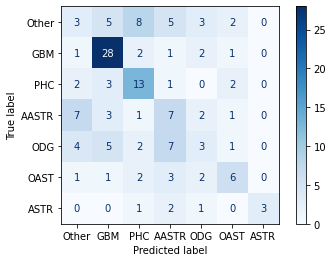

In [ ]:
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues, display_labels=["Other", "GBM", "PHC", "AASTR", "ODG", "OAST", "ASTR", "AOAST"])

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
print(feat_importances.nlargest(100).to_string())

Overall Survival (Months)        0.294793
Mutation Count                   0.290974
Diagnosis Age                    0.260056
Overall Survival Status          0.051163
Sex                              0.039697
Number of Samples Per Patient    0.030228
Somatic Status                   0.017762
Age Group                        0.010044
Additional_cancer                0.005283


In [ ]:
# Grid search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_estimator_

'''
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
'''

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [ ]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.5714285714285714
              precision    recall  f1-score   support

          -1       0.30      0.12      0.17        26
           1       0.71      1.00      0.83        35
           2       0.72      1.00      0.84        21
           3       0.34      0.48      0.40        21
           4       0.29      0.18      0.22        22
           5       0.67      0.53      0.59        15
           6       0.75      0.43      0.55         7

    accuracy                           0.57       147
   macro avg       0.54      0.53      0.51       147
weighted avg       0.52      0.57      0.52       147



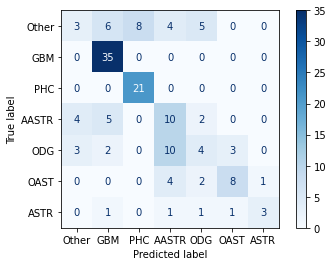

In [ ]:
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues, display_labels=["Other", "GBM", "PHC", "AASTR", "ODG", "OAST", "ASTR", "AOAST"])

In [ ]:
### CV


In [ ]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=330, n_jobs=-1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.58108108, 0.55405405, 0.5       , 0.52702703, 0.54794521,
       0.54794521, 0.49315068, 0.50684932, 0.56164384, 0.53424658])

In [ ]:
y_test.value_counts()

Oncotree Code
 1               35
-1               26
 4               22
 3               21
 2               21
 5               15
 6                7
dtype: int64

In [ ]:
dft6_j6 = dft6[dft6['Oncotree Code'] != -1]
print(dft6_j6.shape)
print(dft6.shape)

(619, 11)
(734, 11)


In [ ]:
Xt6_j6 = dft6_j6[X_cols].drop(['Study ID'], axis=1)
yt6_j6 = dft6_j6[y_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xt6_j6, yt6_j6, test_size = 0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=330, random_state=42, n_jobs=-1)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.5080645161290323
              precision    recall  f1-score   support

           1       0.73      0.70      0.71        43
           2       0.53      0.72      0.61        25
           3       0.42      0.36      0.38        28
           4       0.31      0.22      0.26        18
           5       0.10      0.17      0.12         6
           6       0.00      0.00      0.00         4

    accuracy                           0.51       124
   macro avg       0.35      0.36      0.35       124
weighted avg       0.50      0.51      0.50       124



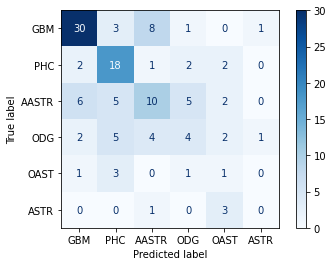

In [ ]:
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues, display_labels=["GBM", "PHC", "AASTR", "ODG", "OAST", "ASTR", "AOAST"])

# Top 3 classes

In [ ]:
dft3 = dft6[(dft6['Oncotree Code'] > 0) & (dft6['Oncotree Code'] < 4)]
print(dft3.shape)
print(dft3.shape)

(429, 11)
(429, 11)


In [ ]:
Xt3 = dft3[X_cols].drop(['Study ID'], axis=1)
yt3 = dft3[y_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xt3, yt3, test_size = 0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=330, random_state=42, n_jobs=-1)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.7674418604651163
              precision    recall  f1-score   support

           1       0.77      0.81      0.79        42
           2       0.87      0.91      0.89        22
           3       0.63      0.55      0.59        22

    accuracy                           0.77        86
   macro avg       0.76      0.75      0.75        86
weighted avg       0.76      0.77      0.76        86



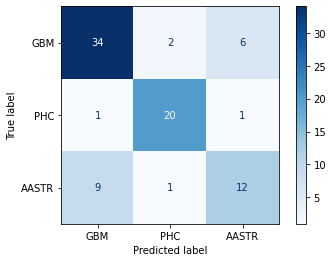

In [ ]:
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues, display_labels=["GBM", "PHC", "AASTR"])

## Exporting model & data

In [ ]:
import joblib

# gdrive_project_root + '/data/processed/cancer_data_preprocessed.csv'

joblib.dump(clf, gdrive_project_root+'models/CLF_3classes_GBM-PHC-AASTR_RandomForest_330estimators_42_random_state.pkl', compress=9)


['drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/models/CLF_3classes_GBM-PHC-AASTR_RandomForest_330estimators_42_random_state.pkl']

In [ ]:
Xt3.to_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_3cls.csv', index=False)
yt3.to_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_3cls.csv', index=False)
x_train.to_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_train_3cls.csv', index=False)
x_test.to_csv(gdrive_project_root + 'data/processed/3_cls_model_input/X_test_3cls.csv', index=False)
y_train.to_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_train_3cls.csv', index=False)
y_test.to_csv(gdrive_project_root + 'data/processed/3_cls_model_input/y_test_3cls.csv', index=False)

# ___Archive

In [ ]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.68      0.91      0.78        35
           2       0.24      0.33      0.28        21
           3       0.00      0.00      0.00         1
           4       0.33      0.11      0.17         9
           5       0.00      0.00      0.00         2
           6       0.31      0.18      0.23        22
           7       0.00      0.00      0.00         1
           9       0.67      0.29      0.40         7
          10       0.69      0.60      0.64        15
          11       0.25      0.40      0.31         5
          13       0.67      0.76      0.71        21
          14       0.00      0.00      0.00         8

    accuracy                           0.50       147
   macro avg       0.32      0.30      0.29       147
weighted avg       0.47      0.50      0.47       147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
